# **How to Increase Occupancy Rate of AirBNB in Bangkok? An Analysis Based on Dataset AirBNB Listings 2013-2022**

During my time at Purwadhika Yogyakarta, I worked on a capstone project where I had the chance to explore and analyze Airbnb listing data from 2013 to 2022. The goal was to put my data analysis skills to the test and see how I could turn raw data into real insights that matter.

I started by getting to know the dataset and asking some key questions:

1. Who are the key stakeholders who would benefit from this analysis?
2. What specific challenges or pain points might these stakeholders encounter in managing Airbnb listings?
3. What preliminary hypotheses or patterns could potentially address these challenges?
4. To what extent does the data validate or contradict these hypotheses?

**Data Source**: The dataset used for this analysis can be downloaded **[here](https://drive.google.com/file/d/1kzEh4nclYmCMEwV4HmsaUdb6NwQlV3LR/view?usp=sharing)**. The explanations for the Airbnb dataset are as follows:

| Column                          | Description                                                                                                                                                 |
|----------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `id`                             | Unique identifier for the listing on Airbnb.                                                                                                                |
| `name`                           | Name of the listing.                                                                                                                                        |
| `host_id`                        | Unique identifier for the host/user on Airbnb.                                                                                                              |
| `host_name`                      | Name of the host.                                                                                                                                            |
| `latitude`                       | Latitude coordinate using the World Geodetic System (WGS84) projection.                                                                                     |
| `longitude`                      | Longitude coordinate using the World Geodetic System (WGS84) projection.                                                                                    |
| `room_type`                      | Type of room: Entire home/apt, Private room, Shared room, Hotel.                                                                                            |
| `price`                          | Daily price in local currency.                                                                             |
| `minimum_nights`                 | The minimum number of nights required for the listing.                                                                          |
| `number_of_reviews`              | The number of reviews the listing has.                                                                                                                      |
| `reviews_per_month`              | The average number of reviews per month the listing has over the lifetime of the listing.                                                                   |
| `last_review`                    | The date of the last/newest review.                                                                                                                         |
| `calculated_host_listings_count`| The number of listings the host has in the current scrape in the city/region geography.                                                                     |
| `availability_365`              | Availability in the next 365 days. Note: A listing may be unavailable due to bookings or being blocked by the host.                                        |
| `number_of_reviews_ltm`         | The number of reviews the listing has received in the last 12 months.                                                                                       |

After conducting basic analyses to understand the data, here is the context I developed.

**Objective of Analysis**

The objective of this analysis is to provide insights for Airbnb's management. I aim to investigate existing problems and offer recommendations to improve the two most important aspects: sales and profits. Additionally, I will suggest new areas for listing expansion to further enhance sales and profitability.

**Problem Statement & Provisional Hypotheses**

When discussing sales and profits, it is closely related to traffic (occupancy rates) and determining the optimal price. Therefore, I formulated several problems to be developed into questions to assist in data exploration.

A. Maximizing Occupancy Rates -> Traffic

   What makes Airbnb proporties have low occupancy rates?
   In exploring this analysis, I use the key metric in the `availability_365` column. This is because the lower the availability value, the more bookings a listing has, and vice versa.

B. Optimal Profit -> Price

   What is the optimal price that hosts can set, attracting interest while still generating profits?
   In exploring this analysis, I use the key metric of price. This is because, assumably, the higher the price, the fewer customers want to book, and vice versa.

C. Listing Expansion -> Neighbourhood
   
   Which neighbourhoods offer the most potential for expanding listings based on customer demand and listing property supply?
   To explore this, I examine key metrics, namely occupancy rates by neighborhood and the total number of listings in those areas. This analysis helps identify high-performing neighborhoods where listings are more likely to attract bookings and generate competitive returns.



## **1. Data Understanding & Preprocessing**

Data understanding is an initial phase in the data science process where an analyst explore and assess the dataset before proceeding to data preparation and modeling. 

This step involves collecting data from relevant sources (in this case, loading the dataset), examining its structure, identifying missing values, detecting outliers, and assessing overall data quality. Exploratory Data Analysis (EDA) techniques, such as statistical summaries and visualizations, help uncover patterns, distributions, and relationships between variables. 

The goal is to ensure the dataset is clean, consistent, and suitable for analysis, preventing potential issues in later stages. By thoroughly understanding the data, analysts can make informed decisions about preprocessing, feature selection, and modeling approaches, ultimately improving the accuracy and reliability of their findings.

In [207]:
# Loading all important libraries for the analysis

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [208]:
# Load Airbnb listings Bangkok dataset

df = pd.read_csv('Airbnb Listings Bangkok.csv').drop('Unnamed: 0', axis=1)

In [209]:
# Checking dataset information

round(df.describe(include="all"))

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.585400e+04,15846,15854.0,15853,15854,15854.0,15854.0,15854,15854.0,15854.0,15854.0,10064,10064.0,15854.0,15854.0,15854.0
unique,NaN,14794,NaN,5312,50,NaN,NaN,4,NaN,NaN,NaN,1669,NaN,NaN,NaN,NaN
top,NaN,New! La Chada Night Market studio 2PPL near MRT,NaN,Curry,Vadhana,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2022-12-11,NaN,NaN,NaN,NaN
freq,NaN,45,NaN,228,2153,NaN,NaN,8912,NaN,NaN,NaN,189,NaN,NaN,NaN,NaN
mean,1.579397e+17,NaN,154105784.0,NaN,NaN,14.0,101.0,NaN,3218.0,15.0,17.0,NaN,1.0,14.0,244.0,3.0
std,2.946015e+17,NaN,131872648.0,NaN,NaN,0.0,0.0,NaN,24972.0,51.0,41.0,NaN,1.0,30.0,126.0,9.0
min,2.793400e+04,NaN,58920.0,NaN,NaN,14.0,100.0,NaN,0.0,1.0,0.0,NaN,0.0,1.0,0.0,0.0
25%,2.104509e+07,NaN,39744308.0,NaN,NaN,14.0,101.0,NaN,900.0,1.0,0.0,NaN,0.0,1.0,138.0,0.0
50%,3.503734e+07,NaN,122455569.0,NaN,NaN,14.0,101.0,NaN,1429.0,1.0,2.0,NaN,0.0,4.0,309.0,0.0
75%,5.256154e+07,NaN,239054688.0,NaN,NaN,14.0,101.0,NaN,2429.0,7.0,13.0,NaN,1.0,13.0,360.0,3.0


In [210]:
# Checking dataset information

df.info()

# After checking the dataset, I change the data type of 'last_review' to datetime

df['last_review'] = pd.to_datetime(df['last_review'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15854 non-null  int64  
 1   name                            15846 non-null  object 
 2   host_id                         15854 non-null  int64  
 3   host_name                       15853 non-null  object 
 4   neighbourhood                   15854 non-null  object 
 5   latitude                        15854 non-null  float64
 6   longitude                       15854 non-null  float64
 7   room_type                       15854 non-null  object 
 8   price                           15854 non-null  int64  
 9   minimum_nights                  15854 non-null  int64  
 10  number_of_reviews               15854 non-null  int64  
 11  last_review                     10064 non-null  object 
 12  reviews_per_month               

In [211]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064,10064.000000,15854.000000,15854.000000,15854.000000
mean,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,2021-08-30 08:37:49.316375296,0.813145,13.889618,244.378643,3.481519
min,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,2012-12-15 00:00:00,0.010000,1.000000,0.000000,0.000000
25%,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,2020-02-20 00:00:00,0.120000,1.000000,138.000000,0.000000
50%,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,2022-10-24 00:00:00,0.435000,4.000000,309.000000,0.000000
75%,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,2022-12-08 00:00:00,1.060000,13.000000,360.000000,3.000000
max,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,2022-12-28 00:00:00,19.130000,228.000000,365.000000,325.000000
std,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,NaN,1.090196,30.269848,125.843224,8.916937


From the description results, I found that the lowest value in the price column is 0, which is not possible. Therefore, I proceeded to remove this data.

In [212]:
df[df['price']==df['price'].min()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
11103,44563108,Somerset Maison Asoke Bangkok,360620448,Somerset Maison Asoke,Vadhana,13.73815,100.5642,Hotel room,0,1,0,NaT,NaN,1,0,0


In [213]:
# Deleting row that the price is zero 

df.drop(index=11103,inplace= True)

### **1.1 Checking duplicates**

There is no duplicate data entry.

In [214]:
df.duplicated().sum()

np.int64(0)

### **1.2 Missing Values**

After checking the information, I found that the dataset consists of 16 columns with 15,854 entries. However, I identified anomalies in the variables host_name (15853 entries), last_review (10,064 entries), and reviews_per_month (10,064 entries). This indicates that these columns have missing values. We can check them again using below function.

In [215]:
df.isna().sum()

id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5789
reviews_per_month                 5789
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

After this inspection, I made sure that variable `host_name` has one missing value, and `last_review` and `reviews_per_month` have 5790 missing values. For variable `host_name`, this missing value do not influece the whole dataset as it only one missing values. However, for `last_review` and `reviews_per_month`, as their missing values are 37 percent of the dataset. 

In [216]:
missing = df.isna().sum().rename('jumlah')
missing = pd.DataFrame(missing)
missing['percentage'] = round((df.isna().sum() / len(df) * 100).rename('percentage'))
missing

,jumlah,percentage
id,0,0.0
name,8,0.0
host_id,0,0.0
host_name,1,0.0
neighbourhood,0,0.0
latitude,0,0.0
longitude,0,0.0
room_type,0,0.0
price,0,0.0
minimum_nights,0,0.0



From the results above, there are 4 columns with missing values:
1. Name (8)
2. Host_name (1)
3. Last_review  (5790) -- 37 percent of the entire data
4. Reviews_per_month (5790) -- 37 percent of the entire data

I started by looking at which columns had missing values. Most of them did not offer much to go on, so it was hard to figure out how to fill in the missing values. But then I checked a listing with a missing name that caught my attention—it belonged to a host named Pakaphol.

When I checked the `calculated_host_listings_count`, I noticed that Pakaphol had multiple listings in different areas. Digging a bit deeper, I found another listing under the same `host name`, and both had the same title: "Errday Guest House".

So, it made sense to fill in the missing `name` for Pakaphol’s listing with "Errday Guest House", since it clearly matched the pattern and connected back to the host.

In [217]:
df[df['host_name']=='Pakaphol']

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1981,13400326,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72427,100.56443,Private room,950,1,1,2020-02-19,0.03,3,1,0
1982,13400758,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72373,100.56415,Private room,36363,1,0,NaT,NaN,3,1,0
2075,13142743,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


In [218]:
df.loc[2075,'name'] = 'Errday Guest House'
df.loc[2075,'name']

'Errday Guest House'

For the other data, I filled in the missing values as mentioned below. 

In [219]:
df.fillna({'name':'Unknown'},inplace=True)
df.fillna({'host_name':'Unknown'},inplace=True)
df.fillna({'reviews_per_month':0},inplace=True)

The reason I filled `name` and `host_name` with 'Unknown' is because, after checking for duplicates, I found none. This indicates that the null values in these columns still represent unique listings, rather than repeated or erroneous entries.

For the `reviews_per_month` column, I filled missing values with 0 to reflect that these listings have not received any reviews. I also observed that the missing values in `reviews_per_month` align with missing values in the `last_review` column, which further supports the assumption that these listings are yet to receive any reviews.

In [220]:
df.isna().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5789
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

To address the missing values in the `last_review` column, I analyzed the data and observed that some entries had a `calculated_host_listings_count` greater than 1, suggesting that certain hosts manage multiple listings. Based on the idea that each listing might reflect on the host as a whole, I chose to group the data to see if those hosts had other active listings beyond the one with missing data.

In [221]:
host_last_review = {}

for index, row in df.iterrows():
    if not pd.isnull(row['last_review']):
        host_last_review[row['host_name']] = row['last_review']
    
host_last_review

df_host_last_review = pd.DataFrame(list(host_last_review.items()), columns=['host_name', 'last_review'])

df_host_last_review

,host_name,last_review
0,Nuttee,2020-01-03
1,Sirilak,2019-02-02
2,Wimonpak,2019-05-09
3,Athitaya,2014-02-03
4,Nol,2016-03-29
...,...,...
3258,Patch,2022-12-20
3259,Suyada,2022-12-18
3260,Non,2022-12-23
3261,Lucky,2022-12-23


After that, I grouped the data by host and selected the maximum value to obtain the most recent review for each host.

In [222]:
df_host_last_review.groupby('host_name')[['last_review']].max()

,last_review
host_name,
.● Bm,2022-12-11
1905 Heritage Corner,2019-04-14
1989 Ratchada,2020-01-31
A,2022-12-20
A Hui 辉泰郎 ปริพล,2020-02-21
...,...
雷,2022-11-11
주은,2022-12-26
형근,2022-11-08


Next, I checked whether the entries with missing values shared the same `host_name` as those with valid `last_review` dates. If a match was found, I used the corresponding value from `df_host_last_review` to fill in the gap. As a result of this step, the number of missing entries in the last_review column dropped to 2,681.

In [223]:
for index, row in df[df['last_review'].isna()].iterrows():
    if row['host_name'] in df_host_last_review['host_name'].values:
        host_last_review = df_host_last_review[df_host_last_review['host_name'] == row['host_name']]
        df.at[index, 'last_review'] = host_last_review['last_review'].values[0]

df.isna().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2681
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [224]:
# Next, for the rest of missing values, i decided to use median value. But, first, I need to check what is the median value of the data.

df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.585300e+04,1.585300e+04,15853.000000,15853.000000,1.585300e+04,15853.000000,15853.000000,13172,15853.000000,15853.000000,15853.000000,15853.000000
mean,1.579496e+17,1.540928e+08,13.745144,100.559903,3.217907e+03,15.293257,16.655207,2021-09-02 03:11:12.335256832,0.516211,13.890431,244.394058,3.481738
min,2.793400e+04,5.892000e+04,13.527300,100.329550,2.780000e+02,1.000000,0.000000,2012-12-15 00:00:00,0.000000,1.000000,0.000000,0.000000
25%,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,2020-02-15 18:00:00,0.000000,1.000000,138.000000,0.000000
50%,3.503224e+07,1.224556e+08,13.738490,100.561410,1.429000e+03,1.000000,2.000000,2022-10-21 00:00:00,0.090000,4.000000,309.000000,0.000000
75%,5.256284e+07,2.390274e+08,13.759500,100.585150,2.429000e+03,7.000000,13.000000,2022-12-08 00:00:00,0.670000,13.000000,360.000000,3.000000
max,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,2022-12-28 00:00:00,19.130000,228.000000,365.000000,325.000000
std,2.946082e+17,1.318666e+08,0.043041,0.050912,2.497290e+04,50.816496,40.614397,NaN,0.952774,30.270630,125.832224,8.917176


In [225]:
#Fill missing values in 'last_review' with the specified datetime value

df.loc[(df['last_review'].isna()), 'last_review'] = '2022-10-21'

In [226]:
df.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

In [227]:
df.shape

(15853, 16)

### **1.2 Distribution Test: Defining & Handling Outlier**


In [228]:
round(df.describe())

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.585300e+04,15853.0,15853.0,15853.0,15853.0,15853.0,15853.0,15853,15853.0,15853.0,15853.0,15853.0
mean,1.579496e+17,154092757.0,14.0,101.0,3218.0,15.0,17.0,2021-11-11 02:59:12.993124352,1.0,14.0,244.0,3.0
min,2.793400e+04,58920.0,14.0,100.0,278.0,1.0,0.0,2012-12-15 00:00:00,0.0,1.0,0.0,0.0
25%,2.104509e+07,39744308.0,14.0,101.0,900.0,1.0,0.0,2020-04-19 00:00:00,0.0,1.0,138.0,0.0
50%,3.503224e+07,122455569.0,14.0,101.0,1429.0,1.0,2.0,2022-10-21 00:00:00,0.0,4.0,309.0,0.0
75%,5.256284e+07,239027368.0,14.0,101.0,2429.0,7.0,13.0,2022-12-03 00:00:00,1.0,13.0,360.0,3.0
max,7.908162e+17,492665929.0,14.0,101.0,1100000.0,1125.0,1224.0,2022-12-28 00:00:00,19.0,228.0,365.0,325.0
std,2.946082e+17,131866606.0,0.0,0.0,24973.0,51.0,41.0,NaN,1.0,30.0,126.0,9.0


Referring to the table description, I am focusing on columns that have a particularly wide range between their maximum and minimum values:

1. The `price` column stands out with a significant range, from 278 to 1,100,000 baht.
2. The `minimum_nights` column also varies widely, with values ranging from 1 to 1125 nights.
3. Although the `number_of_reviews` column also displays a large spread, I do not plan to make any changes to it. Since my main interest is in measuring popularity, retaining the highest review counts is relevant. These high numbers may indicate popular listings or hosts who manage several properties.
4. I also do not intend to further explore the other review-related columns, as they appear to be correlated with `number_of_reviews`, based on the initial feature explanations.
5. The `calculated_host_listings_count` column also shows a wide range, but I will not remove it. I am interested in examining whether there is a relationship between the number of listings a host has and the popularity of those listings. For instance, one host named Curry has a `calculated_host_listings_count` value of 228. After checking, it is confirmed that all of those listings do belong to that host.
6. Similarly, I will retain the original values in the `availability_365` column and will not remove any outliers.

In [229]:
# For example, we can check `calculated_host_listings_count` which has a maximum value of 228

df[df['calculated_host_listings_count'] == 228]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
6473,31029786,Near The Grand Palace/ASOK Station/Sukhumvit#05,201677068,Curry,Khlong Toei,13.735100,100.559190,Entire home/apt,2057,1,60,2022-12-11,1.24,228,361,18
6479,30804041,Near The Grand Palace/ASOK Station/Sukhumvit 5...,201677068,Curry,Khlong Toei,13.733850,100.557140,Entire home/apt,2057,1,76,2022-12-14,1.55,228,361,19
6672,31607546,Near The Grand Palace/ASOK Station/Sukhumvit#06,201677068,Curry,Khlong Toei,13.733950,100.558800,Entire home/apt,2057,1,101,2022-12-14,2.10,228,361,20
7009,32504596,New! Sukhumvit NANA 1BR Suit near BTS 2PPL,201677068,Curry,Ratchathewi,13.750870,100.555970,Entire home/apt,1466,3,86,2022-11-08,1.87,228,356,14
7244,32970026,30days! Sukhumvit NANA spacious 1BR 2PPL near...,201677068,Curry,Ratchathewi,13.749710,100.556570,Entire home/apt,1466,3,81,2022-11-04,1.78,228,358,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14906,750412362717761633,New!Near The Grand Palace/ASOK Station/4PPL,201677068,Curry,Khlong Toei,13.735637,100.557799,Entire home/apt,3429,1,3,2022-12-25,3.00,228,360,3
15336,771365335830828138,30days! AirportLink Sukhumvit NANA MaxValu 2BR...,201677068,Curry,Ratchathewi,13.750300,100.555503,Entire home/apt,3994,3,0,2022-12-25,0.00,228,340,0
15474,780130696121233047,月租特惠！豪华两卧两卫！Ekkamai BTS/The Emporium/曼谷大学/无边泳池...,201677068,Curry,Khlong Toei,13.718087,100.580706,Entire home/apt,1588,30,0,2022-12-25,0.00,228,304,0
15515,777296851892558815,One Siam/Platinum Fashion Mall/Mrt Arl Bts/MBK...,201677068,Curry,Ratchathewi,13.756598,100.540777,Entire home/apt,2000,25,0,2022-12-25,0.00,228,348,0


<function matplotlib.pyplot.show(close=None, block=None)>

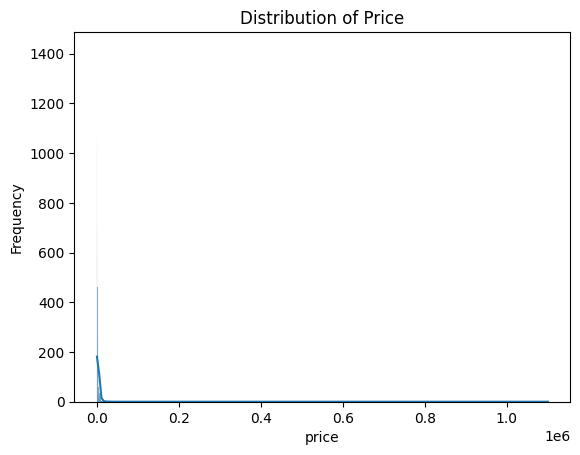

In [230]:
# Performing visual inspection of variable `price`

sns.histplot(data=df, x='price',kde=True);

plt.title('Distribution of Price')

plt.ylabel('Frequency')
plt.show

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15853 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              15853 non-null  int64         
 1   name                            15853 non-null  object        
 2   host_id                         15853 non-null  int64         
 3   host_name                       15853 non-null  object        
 4   neighbourhood                   15853 non-null  object        
 5   latitude                        15853 non-null  float64       
 6   longitude                       15853 non-null  float64       
 7   room_type                       15853 non-null  object        
 8   price                           15853 non-null  int64         
 9   minimum_nights                  15853 non-null  int64         
 10  number_of_reviews               15853 non-null  int64         
 11  last_re

<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

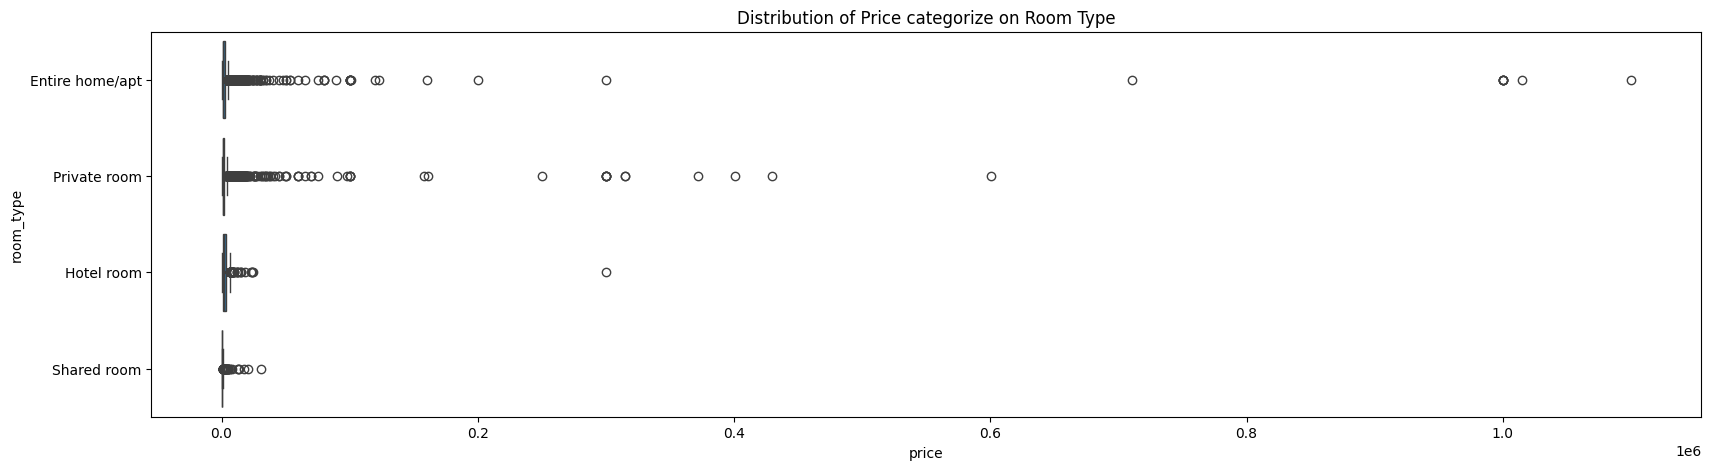

In [232]:
plt.figure(figsize=(20,5))

#  Create boxplot
sns.boxplot(data = df,
            x = 'price',     
            y = 'room_type'
            )   

# Add title
plt.title('Distribution of Price categorize on Room Type')

# Show Legend
plt.legend

The graph above shows that prices across different room types are not normally distributed. The highest outlier comes from hosts offering entire homes or apartments. That is why I decided to take a closer look at the outliers in the `price` data.

In [233]:
# Calculate the first and third quartiles of the 'price' column
Q1 = df['price'].describe()['25%']
Q3 = df['price'].describe()['75%']

# Compute the interquartile range (IQR)
IQR = Q3 - Q1

# Filter listings where the price is greater than the upper bound (Q3 + 1.5 * IQR)
df_upperBound = df[df['price'] > (Q3 + 1.5 * IQR)]

# Print the number of listings considered as upper outliers
print(f'Number of listings in upper bound: {len(df_upperBound)}')

# Print the median price among the upper-bound outliers
print(f"Median price of data in upper bound: {df_upperBound['price'].median()}")

# Count how many of those outliers have a price above the median of the outlier group
print(f"Number of data that exceed the median value: {len(df_upperBound[df_upperBound['price'] > df_upperBound['price'].median()])}")

# Calculate and print the proportion of extreme outliers (above median) relative to the entire dataset
print(f'''Proportion of outliers are {len(df_upperBound[df_upperBound['price'] > df_upperBound['price'].median()]) / len(df)}''')

Number of listings in upper bound: 1403
Median price of data in upper bound: 7340.0
Number of data that exceed the median value: 701
Proportion of outliers are 0.04421875985617864


For the purpose of this analysis, I intend to focus on affordability. To achieve this, I am using data that is more centrally distributed. After performing the calculations, I found that outliers—listings with prices above 7,340—represent only 4.42 percent of the entire dataset. Given their minimal proportion and in order to maintain a focus on typical pricing behavior, I have decided to remove these outlier entries.

In [234]:
df_clean = df.drop(df[df['price'] > 7340].index)
len(df_clean)

15152

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23668\2451311764.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(data=df_clean, x='neighbourhood', y='price', ci=0, estimator='median', order=median_prices.index)


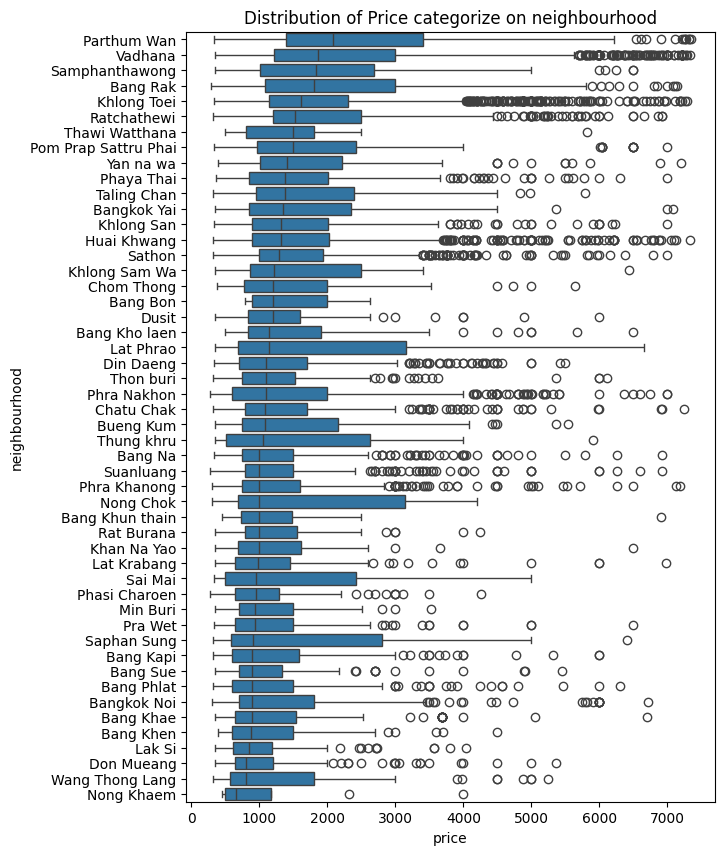

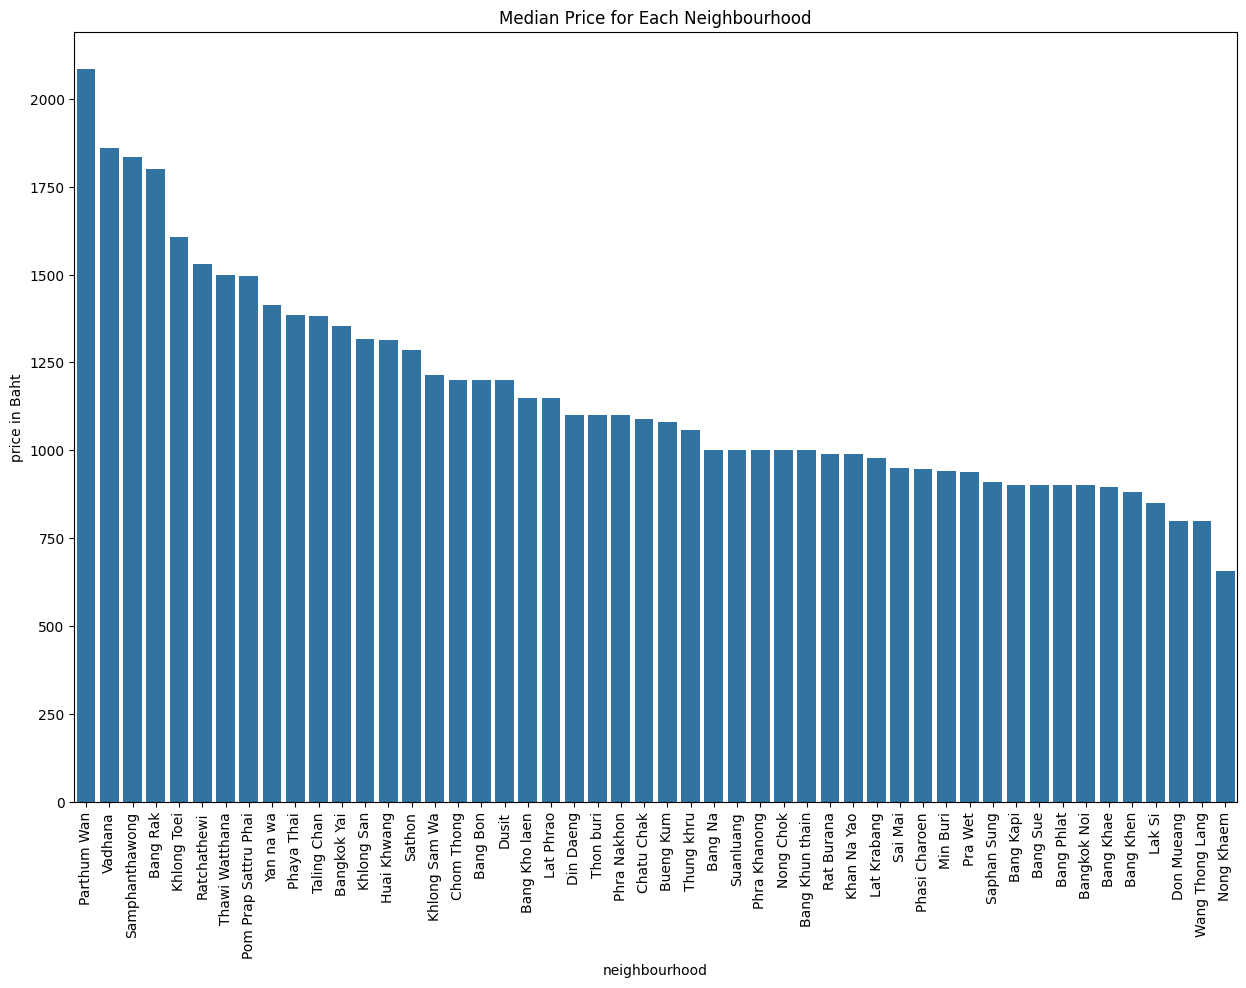

In [235]:

plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
median_prices = df_clean.groupby('neighbourhood')['price'].median().sort_values(ascending=False)

# Create boxplot 
sns.boxplot(data = df_clean,
            x = 'price',     
            y = 'neighbourhood',
            order=median_prices.index
            )   

# Add title to the graph
plt.title('Distribution of Price categorize on neighbourhood')

# -------------------------------------------------------------------------------------------
plt.figure(figsize=(15, 10))
sns.barplot(data=df_clean, x='neighbourhood', y='price', ci=0, estimator='median', order=median_prices.index)

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

plt.title('Median Price for Each Neighbourhood')
plt.ylabel('price in Baht')
plt.show()


<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

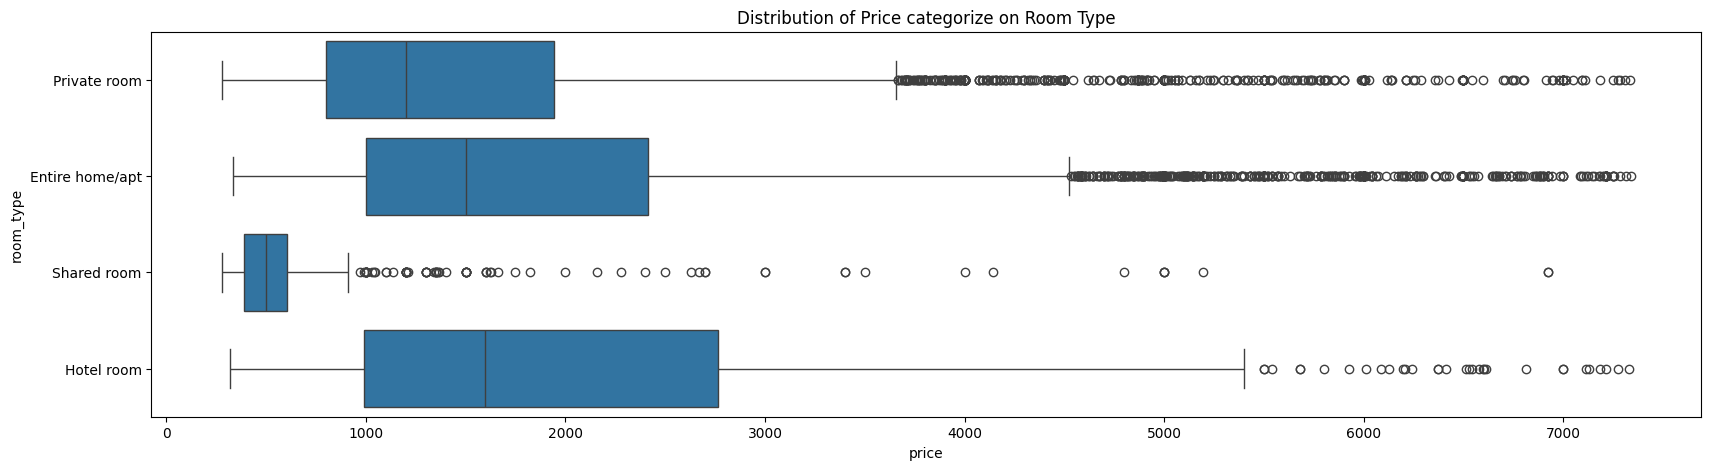

In [236]:
plt.figure(figsize=(20,5))

#  Create boxplot
sns.boxplot(data = df_popular,
            x = 'price',     
            y = 'room_type'
            )   

# Add title
plt.title('Distribution of Price categorize on Room Type')

# Show Legend
plt.legend

In [237]:
# Computing the upper bound for the price column
upper_bound = Q3 + 1.5 * IQR

# Create a column to mark outliers
df['is_outlier'] = df['price'] > upper_bound

# Count number of outliers per neighbourhood
outlier_counts = df[df['is_outlier']].groupby('neighbourhood').size().sort_values(ascending=False)

# Show top 5 neighbourhoods with most price outliers
print(outlier_counts.head(5))

neighbourhood
Vadhana        383
Khlong Toei    210
Huai Khwang     94
Bang Rak        89
Parthum Wan     79
dtype: int64


In [238]:
round(df_clean['price'].describe())

count    15152.0
mean      1755.0
std       1275.0
min        278.0
25%        890.0
50%       1375.0
75%       2186.0
max       7340.0
Name: price, dtype: float64

Based on visual inspection of the above graphs and data calculation, I can conclude that:

**BOXPLOT Insights**

1. The five neighbourhoods with the most noticeable number of outliers are Vadhana (383), Khlong Toei (210), Huai Khwang (94), Bang Rak (89), and Parthum Wan (79).
2. A wide range of prices is visible across most neighbourhoods. This variation is likely influenced by the availability of four different room types, each contributing differently to listing prices.
3. In general, the neighbourhoods have prices that fall between 278 and 7340 Baht (especially after trimming outliers in variable price that is beyond media upperbound).

**BARPLOT Insights**

1. The three neighbourhoods with the highest median prices are Parthum Wan, Vadhana, and Samphanthawong.
2. On the other hand, Nong Khaem, Don Mueang, and Wang Thong Lang have the lowest median prices.
3. Most neighbourhoods show a median price above 800 Baht.

Next, I examined the `minimum_nights` column and became interested in identifying listings that require stays longer than 365 days. Since Airbnb is generally used for short-term accommodations, such listings stand out as unusual. Here is the reference from **[Investopedia Source](https://www.investopedia.com/articles/personal-finance/032814/pros-and-cons-using-airbnb.asp#:~:text=Airbnb%20is%20an%20online%20marketplace,cheaper%20and%20homier%20than%20hotels)**.

In [239]:
len(df_clean[df_clean['minimum_nights'] > 365].index)

11

I discovered that only 11 listings have a minimum stay requirement of more than 365 nights. Since my analysis is focused on stays between 1 and 365 days, I decided to remove these listings from the dataset.

In [240]:
df_clean = df_clean.drop(df_clean[df_clean['minimum_nights'] > 365].index)
len(df_clean)

15141

In [241]:
# Adding year column in df_clean dataset

df_clean['last_review'] = pd.to_datetime(df_clean['last_review'])  # Convert to datetime format
df_clean['year'] = df_clean['last_review'].dt.year 

In [242]:
df[df_clean['year'] == 2012]

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23668\3186412317.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df_clean['year'] == 2012]


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [ ]:
# Outlier in year. Because there only one data in 2012. I delete the data.

df_clean.drop(index=133,inplace= True)

This section is important because the original Airbnb dataset was labeled as covering the period from 2012 to 2022. However, there was only a single data point from 2012, which does not represent the entire year. Therefore, I decided to remove the 2012 data and rename the dataset to Airbnb Listings Bangkok 2013–2022.

## **2. Exploratory Data Analysis (EDA)**

### **2.1. Analysis of Popularity to Increase Airbnb Occupancy Rates**

When discussing Airbnb occupancy rates, it is closely related to customer engagement and behavior.

**Research Question**: What factors influence customers to choose one listing over another?

The initial assumption is that customer decisions are primarily influenced by location, minimum stay, property management, price, and popularity.

To explore this, I focused on the `availability_365` column, which indicates how many days a listing is available throughout the year. A lower value suggests that the listing has already been booked frequently, while a higher value may imply fewer bookings.

In [ ]:
# Total estimate of occupancy rates

((365 - df_clean['availability_365']) / 365 * 100).mean().round(2)

To better understand how actively each listing is being booked, I calculated the occupancy rate based on the `availability_365` column, which indicates how many days a listing was available throughout the year. The logic is simple: if a listing is available for fewer days, it was likely booked more often.

By subtracting the number of available days from 365 and converting it into a percentage, I created a new column, `occupancy_rate`, which gives a more intuitive measure of how much each listing is actually utilized. I also rounded the values to two decimal places for better readability in visualizations and summaries.

In [ ]:
# Adding occupancy rate column

df_clean['occupancy_rate'] = ((365 - df_clean['availability_365']) / 365) * 100
df_clean['occupancy_rate'] = df_clean['occupancy_rate'].round(2)  # round to 2 decimals

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=df_clean, x='availability_365', bins=20)

# adding sum of the number above bar label
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (patch.get_x() + patch.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=9)

plt.title('Distribution of Availability (365 Days)')
plt.xlabel('Availability (days/year)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Next, I categorized the popularity by dividing them into quartile groups by column `availability_365`.

In [ ]:
# Creating  array from 1 to 365
data = np.arange(1, 366)

# Calculating quartile (25%, 50%, 75%)
Q1 = int(round(np.percentile(data, 25)))
Q2 = int(round(np.percentile(data, 50)))  # Median
Q3 = int(round(np.percentile(data, 75)))

print("Quartile Ranges:")
print(f"Q1: 1 to {Q1}")
print(f"Q2: {Q1 + 1} to {Q2}")
print(f"Q3: {Q2 + 1} to {Q3}")
print(f"Q4: {Q3 + 1} to 365")


In [ ]:
# Make groups based on the number of availability 
def popularity(availability):
    if availability in range(0, 93):
        return 'Very Popular'
    elif availability in range(92, 184):
        return 'Popular'
    elif availability in range(183, 275):
        return 'Less Popular'
    elif availability in range(274, 366):
        return 'Not Popular'

# Make additional column 
df_clean['popularity'] = df_clean['availability_365'].apply(popularity)


In [ ]:
avail_0_92_df = df_clean[df_clean['availability_365'].between(0, 92)]
avail_93_183_df = df_clean[df_clean['availability_365'].between(93, 183)]
avail_184_274_df = df_clean[df_clean['availability_365'].between(184, 274)]
avail_275_365_df = df_clean[df_clean['availability_365'].between(275, 365)]

In [ ]:
df_popular = pd.concat([avail_0_92_df, avail_93_183_df, avail_184_274_df, avail_275_365_df])

popularity_map = {
    'Not Popular': 1,
    'Less Popular': 2,
    'Popular': 3,
    'Very Popular': 4
}

df_popular['popularity_score'] = df_popular['popularity'].map(popularity_map)

df_popular.head()

In [ ]:
df_popular.groupby(by='host_name')[['name']].count().sort_values(by='name', ascending=False).head(5)

In [ ]:
plt.figure(figsize=(8, 5))
ax = sns.histplot(data=df_popular, x='popularity', discrete=True)

# Tambahkan label angka di atas tiap bar
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (patch.get_x() + patch.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=9)

plt.title('The Number of Airbnb Listing on Each Popularity Category')
plt.xlabel('Popularity')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()


In [ ]:
def classify_host(count):
    if count <= 4:
        return 'Mikro'
    elif 5 <= count <= 13:
        return 'Medium'
    else:
        return 'Makro'

df_popular['host_type'] = df_popular['calculated_host_listings_count'].apply(classify_host)

##### ||| Additional Columns for Airbnb Analysis

To support deeper insights from the Airbnb dataset, three new columns were created:

1. `popularity` (Categorical Variable): This categorical variable was derived from the `availability_365` column to classify listings based on estimated demand levels:

- Very Popular: 0–92 days available (high booking frequency)
- Popular: 92–183 days available
- Less Popular: 183–274 days available
- Not Popular: 274–365 days available (low booking frequency)

The logic assumes that the fewer days a listing is available, the more often it is being booked.

2. `occupancy_rate` (Numeric Variable): This numeric column represents the estimated percentage of days a listing is occupied, calculated as:

occupancy_rate = (365 - 'availability_365') / 365) * 100

The result is rounded to two decimal places.

3. `year` (Datetime Feature): The `year` column was extracted from the `last_review` column after converting it to datetime format. It captures the year of the most recent review for each listing and allows for year-based filtering and analysis.

4. `host_type` (Categorical Variable): Categorizes hosts based on the number of listings they manage, using the `calculated_host_listings_count` column:

- Mikro: 1–4 listings
- Medium: 5–13 listings
- Makro: 14 or more listings

This segmentation allows analysis of host scale and performance differences, such as comparing occupancy or popularity by host size.

## **3. Statistical Analysis**

After categorizing the data into four groups based on their popularity, I will examine whether there is any relationship between the variables. Given the large number of columns, I’ve grouped them into categorical and numerical types.

#### **3.1. Categorical Variable Test vs Popularity** 

For categorical vs. categorical statistical testing, the variables include:

1. Host Name
2. Neighbourhood
3. Room Type

In [ ]:
from scipy.stats import chi2_contingency

# Hypothesis
# H0 = 'host_name' or 'neighbourhood' or 'room_type' dont have any relationship with popularity
# Ha = 'host_name' or 'neighbourhood' or 'room_type' have relationship with popularity

# Define hypothesis testing function
def hypothesis_test(feature):
    df_crosstab = pd.crosstab(df_popular['popularity'], df_popular[feature])
    stats, p_value, dof, _ = chi2_contingency(df_crosstab)
    if p_value > 0.05:
        return stats, p_value, "Accept H0"
    else:
        return stats, p_value, "Reject H0"

# Define features to test
features = ['host_name', 'neighbourhood', 'room_type']

# Perform hypothesis testing for each feature
results = []
for feature in features:
    stats, p_value, hypothesis_status = hypothesis_test(feature)
    results.append({'Feature': feature, 'Statistic': stats, 'P-value': p_value, 'Hypothesis': hypothesis_status})

# Sort results based on p-value
ranked_results = sorted(results, key=lambda x: x['P-value'])

# Print results
print("Ranked Features based on Chi-squared Test:")
for rank, result in enumerate(ranked_results, 1):
    print(f"{rank}. {result['Feature']}: Statistic = {result['Statistic']:.4f}, P-value = {result['P-value']:.4f}. {result['Hypothesis']} null hypothesis.")


In this section, I applied the chi-square test as it is suitable for analyzing relationships between categorical variables. The test results showed that all features led to the rejection of the null hypothesis. This indicates that `host_name`, `neighbourhood`, and `room_type` are associated with popularity and may influence a customer’s decision-making.

##### **3.1.1. Host Name Analysis**

Top 10 host in Bangkok

In [ ]:
# Top 10 hosts based on the number of listings

df_popular.groupby('host_name')['calculated_host_listings_count'].max().sort_values(ascending=False).head(10)


In [ ]:
# Top 10 hosts based on popularity

df_popular[df_popular['popularity'] == 'Very Popular'].groupby('host_name').size().sort_values(ascending=False).head(10)

In [ ]:
host_popular = ['Curry','Mike','Eva','Patty','Weeraya']

df_popular[df_popular['host_name'].isin(host_popular)].groupby('host_name')['calculated_host_listings_count'].max()


In [ ]:
host_popular = ['Curry', 'Mika', 'Eva', 'Patty', 'Weeraya']
df_popular[df_popular['host_name'].isin(host_popular)].groupby(by='host_name')['popularity'].value_counts()

In [ ]:
# Grouping and sorting
top_hosts = df_popular.groupby('host_name')['calculated_host_listings_count'].max().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=top_hosts.values, y=top_hosts.index, palette='viridis')
plt.title('Top 10 Hosts by Number of Listings')
plt.xlabel('Number of Listings')
plt.ylabel('Host Name')
plt.tight_layout()
plt.show()

In [ ]:
# The 10 least popular hosts based on Airbnb listing number

df_popular[df_popular['popularity'] == 'Not Popular'].groupby('host_name').size().sort_values(ascending=False).tail(10)

To support the validity of the findings, I also identified the 10 least popular hosts by analyzing the previously defined popularity groups. They tend to have only one listing which indicate that their properties were not professionally managed.

Further analysis revealed a clear relationship between these top hosts and the `calculated_listings_count` column. All of the most popular hosts had more than 14 listings, indicating that they are likely professionally managed. This professional management could contribute to greater listing reliability. Additionally, it is plausible that Airbnb’s algorithm favors such hosts due to their established reputation across multiple listings. Additionally, I also performed ANOVA test to check if there is a difference between `host_name` and `popularity`.



In [ ]:
from scipy import stats

# Step 1: Group values by popularity
groups = [group['calculated_host_listings_count'].values 
          for name, group in df_popular.groupby('popularity')]

# Step 2: Run one-way ANOVA
f_stat, p_value = stats.f_oneway(*groups)

print("ANOVA F-statistic:", f_stat)
print("p-value:", p_value)

To further analyze this relationship, I classified `host_name` into three categories based on the number of listings they manage: micro (hosts with 4 or fewer listings), medium (hosts with 5 to 13 listings), and macro (hosts with more than 13 listings).

In [ ]:
def classify_host(count):
    if count <= 4:
        return 'Micro'
    elif 5 <= count <= 13:
        return 'Medium'
    else:
        return 'Macro'

df_popular['host_type'] = df_popular['calculated_host_listings_count'].apply(classify_host)

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_popular, x='host_type', hue='popularity', order=['Macro', 'Medium', 'Micro'])

# Add count labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3)
    
plt.title('Number of Listings by Host Type and Popularity')
plt.xlabel('Host Type')
plt.ylabel('Number of Listings')
plt.legend(title='Popularity')
plt.tight_layout()
plt.show()

In [ ]:
# Create a crosstab of counts
table = pd.crosstab(df_popular['host_type'], df_popular['popularity'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(table)
print(f"Chi-square statistic: {chi2}, p-value: {p}")



##### **3.1.2. Room Type Analysis**

In [ ]:
# Checking the number of room based on room type

df_popular.groupby(by='room_type')[['name']].count().sort_values(by='name',ascending=False)

In [ ]:
pd.crosstab(df_popular['popularity'], df_popular['room_type'])

In [ ]:
# Count number of listings by room_type and popularity
popularity_room_counts = df_popular.groupby(['room_type', 'popularity']).size().unstack().fillna(0)

# Plotting
popularity_room_counts.plot(kind='bar', stacked=True, figsize=(10,6))

plt.xticks(rotation=0)

plt.xlabel("Room Type")
plt.ylabel("Number of Listings")
plt.title("Distribution of Listing Popularity by Room Type")
plt.legend(title="Popularity")

plt.tight_layout()  # agar label tidak terpotong
plt.show()

When it comes to room type, customers tend to favor entire homes or apartments, likely because they offer full access to the space and greater privacy. This preference is followed by private rooms, hotel rooms, and lastly, shared rooms.

##### **3.1.3. Neighbourhood Analysis**

In [ ]:
# Checking which neighbourhood that is very popular

df_popular[df_popular['popularity'] == 'Very Popular'].groupby('neighbourhood').size().sort_values(ascending=False).head(10)

In [ ]:
neighbourhood_popular = ['Vadhana', 'Khlong Toei', 'Huai Khwang', 'Ratchathewi', 'Bang Rak']
df_popular[df_popular['neighbourhood'].isin(neighbourhood_popular)].groupby(by='neighbourhood')['popularity'].value_counts()

In [ ]:
# Checking the proportion of those 5 very popular neighboourhood based on the number of total listings in those neighbourhood

(df_popular[(df_popular['neighbourhood'].isin(neighbourhood_popular)) & (df_popular['popularity'] == 'Very Popular')].groupby('neighbourhood').size().div(df_popular[df_popular['neighbourhood'].isin(neighbourhood_popular)].groupby('neighbourhood').size()).sort_values(ascending=False))

In [ ]:
# Cheking the proportion of each neighbourhood based on popularity

(df_popular[df_popular['popularity'] == 'Very Popular'].groupby('neighbourhood').size() / df_popular.groupby('neighbourhood').size()).sort_values(ascending=False).head(10)


In [ ]:
# Checking the number of room based on neighbourhood

df_popular.groupby(by='neighbourhood')[['name']].count().sort_values(by='name',ascending=False).head(10)

Based on the categorical vs. categorical analysis, we can conclude that `neighbourhood`, `host_name`, and `room_type` all influence a listing’s popularity. The top 10 neighbourhoods have been highlighted in the pivot table above. Furthermore, hosts with multiple listings tend to attract more traffic, likely due to greater visibility and perceived reliability. In addition, the data shows that customers generally prefer to book entire apartments for their stay.

When comparing all three dataframes, it becomes clear that Curry consistently stands out as the top host. This is likely due to his large number of listings, which enhances both his visibility and credibility. The top six neighbourhoods remain consistent across all datasets, with the exception of listings with more than six entries, where Phra Khanong and Bang Na show slight differences. In terms of room type, the pattern remains stable across all dataframes—guests consistently prefer entire home/apartment stays.

##### **3.1.4. Recommended Neighbourhood Expansion Analysis**

To recommend areas for Airbnb listing expansion, I focused on identifying neighborhoods with high demand but low supply of Airbnb properties. This was done by comparing occupancy rates and the total number of listings across different areas.

To enable this comparison, I applied min-max normalization to rescale the data to a range of 0 to 1 (Han, Pei, & Kamber, 2011).

In [ ]:
# 1. Grouping data by neighbourhood
grouped = df_popular.groupby('neighbourhood').agg({
    'occupancy_rate': 'median',
    'id': 'count'
}).reset_index()

# 2. Rename for clarity
grouped.rename(columns={
    'occupancy_rate': 'Median Occupancy Rate',
    'id': 'Listing Count'
}, inplace=True)

# 3. Normalisasi ke 0–1
grouped['Normalized Occupancy Rate'] = (
    grouped['Median Occupancy Rate'] - grouped['Median Occupancy Rate'].min()
) / (
    grouped['Median Occupancy Rate'].max() - grouped['Median Occupancy Rate'].min()
)

grouped['Normalized Listing Count'] = (
    grouped['Listing Count'] - grouped['Listing Count'].min()
) / (
    grouped['Listing Count'].max() - grouped['Listing Count'].min()
)

# 4. Urutkan berdasarkan Occupancy Rate tertinggi
grouped_sorted = grouped.sort_values(by='Normalized Occupancy Rate', ascending=False).reset_index(drop=True)

# 5. Plot
x = grouped_sorted['neighbourhood']
x_indexes = range(len(x))
width = 0.35

plt.figure(figsize=(14,6))
plt.bar(
    [i - width/2 for i in x_indexes],
    grouped_sorted['Normalized Occupancy Rate'],
    width=width,
    label='Occupancy Rate (Normalized)'
)
plt.bar(
    [i + width/2 for i in x_indexes],
    grouped_sorted['Normalized Listing Count'],
    width=width,
    label='Listing Count (Normalized)'
)

plt.xticks(ticks=x_indexes, labels=x, rotation=45, ha='right')
plt.ylabel("Normalized Value (0–1)")
plt.xlabel("Neighbourhood")
plt.title("Normalized Occupancy Rate & Listing Count by Neighbourhood (Sorted by Occupancy Rate)")
plt.legend()
plt.tight_layout()
plt.show()

**Insight**: Based on above visual inspection, I can conclude that we can perform Airbnb listing expansion (Neighbourhood-Level) based on the analysis of normalized occupancy rate vs listing count:

**Top Neighbourhoods for Expansion**

These areas show high demand (occupancy) but low supply (few listings):

- Thawi Watthana — Above-average occupancy, low listing count, offers local charm and peaceful stays
- Nong Chok — Highest occupancy with very few listings, major opportunity for eco-tourism and retreats
- Khan Na Yao — Strong occupancy and low supply, good for family-friendly stays near malls and parks
- Wang Thong Lang — Solid demand in a student- and local-friendly area, still underdeveloped for Airbnb
- Bang Sue — High occupancy with major transport growth (Bang Sue Grand Station), ideal for early entry
- Samphanthawong — Strong tourist appeal in historic Chinatown, listing count still manageable

Other promising areas for expansion:

- Huai Khwang — Strong demand with limited Airbnb properties
- Khlong Toei — High demand, moderate listings, good long-term potential
- Bang Phlat — Riverside charm, low competition, appealing for longer stays
- Phra Khanong — Popular with young travelers and remote workers, still room to grow
- Phaya Thai — Transit-friendly, ideal for short-stay visitors, underutilized potential
- Ratchathewi — Central location with consistent demand, but less Airbnb saturation than neighbors

**Avoid for Now**: Areas with low occupancy but many listings, like Chatuchak or Pathum Wan, may be saturated or declining in demand.

In [ ]:
# Define target areas
target_areas = [
    'Bang Sue', 'Samphanthawong', 'Bang Phlat',
    'Phra Khanong', 'Phaya Thai', 'Ratchathewi',
    'Huai Khwang', 'Khlong Toei', 'Huai Khwang', 
    'Khlong Toei', 'Phra Khanong' 'Thawi Watthana',
    'Nang Chok', 'Khan Na Yao', 'Wang Thong Lang', 
    'Samphanthawong'
]

# Filter to only target areas
df_target = df_popular[df_popular['neighbourhood'].isin(target_areas)]

# Group by neighbourhood to count listings and calculate average occupancy rate
result = df_target.groupby('neighbourhood').agg(
    listing_count=('id', 'count'),
    occupancy_rate=('occupancy_rate', 'mean')
).reset_index()

# Sort from highest to lowest occupancy rate
result_sorted = result.sort_values(by='occupancy_rate', ascending=False).reset_index(drop=True)

result_sorted

In [ ]:
# Adding two columns in the dataset. These columns are important for Tableau dashboard visualization

df_popular = df_popular.merge(
    grouped[['neighbourhood', 'Normalized Occupancy Rate', 'Normalized Listing Count']],
    on='neighbourhood',
    how='left'
)

##### ||| Additional Columns for Airbnb Analysis

To further support deeper insights from the Airbnb dataset, two columns were created:

- `Normalized Occupancy Rate` & `Normalized Listing Count` (Numerical Variables)

These two columns were merged from an aggregated dataset grouped by neighbourhood, providing standardized values for:

- `Normalized Occupancy Rate`: The median occupancy of each neighborhood, normalized to a 0–1 scale.
- `Normalized Listing Count`: The total number of listings in each neighborhood, also normalized to 0–1.

These features enabled fair comparisons across neighborhoods regardless of size or scale.

#### **3.2. Numerical Variable Test vs Popularity**

Having completed the analysis of categorical variables, we now turn to exploring numerical variables versus popularity. For this part of the analysis, we focus on the following variables:

1. Price – to examine the overall price distribution and how it relates to popularity levels.
2. Minimum nights – to gain insights into customer preferences for short-term versus long-term stays.
3. Number of reviews – to explore whether there's a correlation between the number of reviews and a listing’s popularity.

In [ ]:
# Select only numerical columns from the dataset
numerik = df_popular.select_dtypes(include='number')

# From those, filter for specific columns that are most relevant for analysis
numerik = numerik[['price',                 # Price per night in Baht
                   'minimum_nights',        # Minimum number of nights required per booking
                   'number_of_reviews',     # Total number of reviews received by the listing
                   'availability_365',      # Number of days the listing is available in a year
                   'occupancy_rate',        # Estimated occupancy percentage based on availability
                   'popularity_score']]     # Popularity encoded numerically (e.g., 1 = Not Popular, 4 = Very Popular)

# Show the resulting DataFrame
numerik

In [ ]:
# Select integer-type columns
test_histogram = numerik

# Calculate the number of rows and columns needed for subplots
num_cols = 3
num_rows = -(-len(test_histogram.columns) // num_cols)  # Ceiling division to ensure enough rows for all columns

# Set up subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))  # Adjust figsize based on the number of rows

# Iterate over each column and plot histogram
for idx, column in enumerate(test_histogram.columns):
    row = idx // num_cols
    col = idx % num_cols
    axs[row, col].hist(test_histogram[column], bins=10)
    axs[row, col].set_title(f'Histogram of {column}')
    axs[row, col].set_xlabel(column)
    axs[row, col].set_ylabel('Frequency')

# Remove any unused subplots
for idx in range(len(test_histogram.columns), num_rows*num_cols):
    row = idx // num_cols
    col = idx % num_cols
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Performing normality test for each variable to determine the suitable statistical test to do.

from scipy.stats import kstest, norm

for col in ['price', 'minimum_nights', 'number_of_reviews', 'availability_365', 'occupancy_rate']:
    standardized = (df_popular[col] - df_popular[col].mean()) / df_popular[col].std()
    stat, p = kstest(standardized, 'norm')
    print(f"{col}: KS={stat:.4f}, p-value={p:.4e}")
    if p < 0.05:
        print(" → Not normally distributed\n")
    else:
        print(" → Likely normally distributed\n")

The histogram and normality test (Kolmogorov-Smirnov test) above reveals several key insights:

1. None of the variables follow a normal distribution.
2. The majority of listings are priced between 250 and 1800 baht.
3. Minimum night stays offered range from 1 to 365 nights.
4. Most listings have between 0 and 100 reviews.
5. It’s highly likely that many hosts manage more than one listing.

In [ ]:
# Compute Spearman correlation
corr = numerik.corr(method='spearman')

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Spearman Correlation Heatmap')
plt.tight_layout()
plt.show()

The Spearman correlation heatmap above shows the strength and direction of monotonic relationships between six numeric variables in the Airbnb dataset: `price, minimum_nights, number_of_reviews, availability_365, occupancy_rate`, and `popularity_score`.

From the heatmap, we can observe that `availability_365` has a perfect negative correlation (-1.00) with `occupancy_rate` and a very strong negative correlation (-0.91) with `popularity_score`. This makes sense because a lower availability value typically reflects more bookings, which results in higher occupancy and popularity.

Conversely, `occupancy_rate` and `popularity_score` are perfectly and strongly positively correlated (0.91), reinforcing the assumption that listings with higher occupancy rates tend to be more popular.

Other variables such as `price, minimum_nights`, and `number_of_reviews` show weak or negligible correlations with popularity or occupancy. For example, price has very low correlation (around 0.02) with both `popularity_score` and `occupancy_rate`, suggesting that price alone does not significantly influence popularity in this dataset.

In conclusion, the strongest relationships are found among availability, occupancy, and popularity, while price and number of reviews show weaker effects. These insights highlight the importance of managing availability and occupancy strategically to boost listing popularity.

##### **3.2.1. Price Analysis**

**Question**: What price range remains competitive while maximizing profitability?

The price variable is influenced by multiple factors. Therefore, it is essential to examine potential correlations with other numerical variables. Alternatively, price may exhibit a stronger association with specific categorical variables (e.g., popularity), which will also be explored.


In [ ]:
# Overall Price Distribution

# Define bins for price distribution
bins = np.arange(0, df_popular['price'].max() + 500, 500)  # e.g., 0 to max price, step of 500 Baht

plt.figure(figsize=(12, 6))

# Plotting lineplot of price distribution per popularity group
for label, group in df_popular.groupby('popularity'):
    counts, _ = np.histogram(group['price'], bins=bins)
    sns.lineplot(x=bins[:-1], y=counts, label=label)

plt.title("Price Distribution by Popularity Group")
plt.xlabel("Price (Baht)")
plt.ylabel("Number of Listings")
plt.legend(title="Popularity")
plt.tight_layout()
plt.show()

The majority of listings fall into the "Not Popular" group, especially those priced between 500–1,500 Baht. This shows that competitive pricing alone doesn't ensure popularity—other factors like host quality and reviews matter.

"Popular" and "Very Popular" listings are mostly in the 500–2,000 Baht range, suggesting that balanced pricing works best. Listings above 3,000 Baht are rare and often underperform, likely due to reduced visibility and demand. Meanwhile, "Less Popular" listings are few across all price points, possibly due to poor positioning or lack of exposure.

In [ ]:
# 1. Filter data
filtered_df_1 = df_popular[df_popular['popularity'].isin(['Popular', 'Very Popular'])]
filtered_df_2 = df_popular[df_popular['popularity'].isin(['Less Popular', 'Not Popular'])]

# 2. Define price bins (up to 95th percentile)
bins1 = np.linspace(0, filtered_df_1['price'].quantile(0.95), 50)
bins2 = np.linspace(0, filtered_df_2['price'].quantile(0.95), 50)

plt.figure(figsize=(15, 5))

# 3. Line chart for Popular & Very Popular listings
plt.subplot(1, 2, 1)
for label in ['Popular', 'Very Popular']:
    group = filtered_df_1[filtered_df_1['popularity'] == label]
    counts, _ = np.histogram(group['price'], bins=bins1)
    sns.lineplot(x=bins1[:-1], y=counts, label=label)
plt.title('Price Distribution (Popular & Very Popular)')
plt.xlabel('Price in Baht')
plt.ylabel('Frequency')

# 4. Line chart for Less Popular & Not Popular listings
plt.subplot(1, 2, 2)
for label in ['Less Popular', 'Not Popular']:
    group = filtered_df_2[filtered_df_2['popularity'] == label]
    counts, _ = np.histogram(group['price'], bins=bins2)
    sns.lineplot(x=bins2[:-1], y=counts, label=label)
plt.title('Price Distribution (Less Popular & Not Popular)')
plt.xlabel('Price in Baht')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:


# Segment 1: Popular & Very Popular
popular_df = df_popular[df_popular['popularity'].isin(['Popular', 'Very Popular'])]

# Segment 2: Less Popular & Not Popular
unpopular_df = df_popular[df_popular['popularity'].isin(['Less Popular', 'Not Popular'])]

# Define common price bins (based on 95th percentile of entire dataset)
bins = np.linspace(0, df_popular['price'].quantile(0.95), 50)

plt.figure(figsize=(15, 5))

# 1. Line chart for Popular + Very Popular
plt.subplot(1, 2, 1)
for label, group in popular_df.groupby('room_type'):
    counts, _ = np.histogram(group['price'], bins=bins)
    sns.lineplot(x=bins[:-1], y=counts, label=label)
plt.title('Price Distribution by Room Type (Popular & Very Popular)')
plt.xlabel('Price in Baht')
plt.ylabel('Frequency')

# 2. Line chart for Less Popular + Not Popular
plt.subplot(1, 2, 2)
for label, group in unpopular_df.groupby('room_type'):
    counts, _ = np.histogram(group['price'], bins=bins)
    sns.lineplot(x=bins[:-1], y=counts, label=label)
plt.title('Price Distribution by Room Type (Less Popular & Not Popular)')
plt.xlabel('Price in Baht')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


From above visual inspection, we can conclude that:

1. When comparing the general price distribution and price distribution grouped by room type, the price fall within a similar price range of 500 to 1500 baht. However, the most frequent price point for popular listings is above 1,000 baht, whereas for general price distribution, it is below 2,000 baht.
2. Analyzing the room types reveals that entire homes or apartments are typically priced between 750 and 1800 baht. Private rooms tend to fall in the 500 to 1200 baht range, hotel rooms range from 800 to 1800 baht, and shared rooms are generally priced between 278 and 700 baht.
3. Moreover, popularity data suggests that guests strongly prefer entire homes or apartments, even at higher prices, as long as they have access to the whole property.

In [ ]:
len(df_popular[(df_popular['price'] > 4000) & (df_popular['occupancy_rate'] == 0)])

Other price insight:

- Some high-priced properties suffer from low occupancy rates (not popular)
- Overpricing leads to reduced visibility in search results
- This results in lower traffic and fewer bookings, regardless of listing quality
- Many of these listings fall outside the optimal price range observed in popular listings
- Looking at the details: there were 150 Airbnb properties with price higher than 4,000 Baht that have 0 occupancy rates. This means that no customer book that properties in a year. 

##### **||| Recommended Prices**

Based on above analysis, we created a recommended prices by grouping listings based on neighbourhood and room type to reflect the unique market conditions in each area. By calculating the interquartile range (IQR) for prices within each group, we can identify a reasonable minimum, median, and maximum price that excludes extreme outliers. 

This method ensures pricing is based on actual market behavior rather than arbitrary averages. It helps hosts avoid overpricing—which can reduce visibility and bookings—and underpricing, which may lower revenue despite high demand. Ultimately, this approach supports strategic, data-driven pricing tailored to local competition and guest expectations.

In [ ]:
harga = df_popular[['neighbourhood', 'price', 'room_type']] # only taking 3 columns: neighbourhood, price, and room_type

In [ ]:
# Calculating Q1 dan Q3

q1 = harga['price'].quantile(0.25)
q3 = harga['price'].quantile(0.75)
iqr = q3 - q1

# Setting lower and upper bound for the data
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filtering only normal data
harga_normal = harga[(harga['price'] >= lower_bound) & (harga['price'] <= upper_bound)]


In [ ]:
def calculate_iqr_bounds(group):
    q1 = group['price'].quantile(0.25)
    q3 = group['price'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    actual_min_price = group['price'].min()

    return pd.Series({
        'iqr_lower_bound': max(lower_bound, actual_min_price),
        'iqr_median_price': group['price'].median(),
        'iqr_upper_bound': q3 + 1.5 * iqr
    })

iqr_price = (
    harga_normal
    .groupby(['neighbourhood', 'room_type'], group_keys=False)
    .apply(calculate_iqr_bounds)
    .reset_index()
)

iqr_price

In [ ]:
harga = harga.merge(iqr_price, on=['neighbourhood', 'room_type'], how='left')

df_popular = df_popular.merge(iqr_price, on=['neighbourhood', 'room_type'], how='left')


In [ ]:
# Recommended price for each neighbourhood and room type

harga.to_csv('RecommendedPrice.csv', index=False)

**Note**: This recommended price is not a rigid measurement; rather, it should be tailored to various factors such as room type, neighborhood condition and popularity, minimum night bookings, occupancy rate, and listing popularity or reviews. These elements help ensure pricing remains competitive, reflects market demand, and supports both visibility and profitability.

##### **3.2.2. Folium of Recommended Price**

In this part, I created a map visualization of Airbnb price distribution in Bangkok using Folium.

Each marker on the map represents an individual listing and displays the neighbourhood, room type, actual price, minimum price (based on IQR by neighbourhood and room type), median price, and maximum price.

This allows users to spatially compare actual listing prices to their expected range, making it easier to identify overpriced listings, undervalued opportunities, and neighborhoods with concentrated pricing tiers.

Overall, the map provides a geographical overview that supports better pricing strategies and location-based analysis.

In [ ]:
import folium
from folium.plugins import MarkerCluster
import pandas as pd

# Assuming your DataFrame is named df_popular and contains necessary columns
# Including: latitude, longitude, neighbourhood, room_type, price, iqr_lower_bound, iqr_median_price, iqr_upper_bound

# Create base map centered on Bangkok
m = folium.Map(location=[13.7563, 100.5018], zoom_start=11)

# Add marker clustering
marker_cluster = MarkerCluster().add_to(m)

# Loop through the data to add markers
for idx, row in df_popular.iterrows():
    popup_text = f"""
    <b>Neighbourhood:</b> {row['neighbourhood']}<br>
    <b>Room Type:</b> {row['room_type']}<br>
    <b>Actual Price:</b> {row['price']} Baht<br>
    <b>Min Price:</b> {row['iqr_lower_bound']} Baht<br>
    <b>Median Price:</b> {row['iqr_median_price']} Baht<br>
    <b>Max Price:</b> {row['iqr_upper_bound']} Baht
    """
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=folium.Popup(popup_text, max_width=300),
        icon=folium.Icon(color='blue', icon='home', prefix='fa')
    ).add_to(marker_cluster)

# Show map
m


##### **3.2.3. Review Analysis**

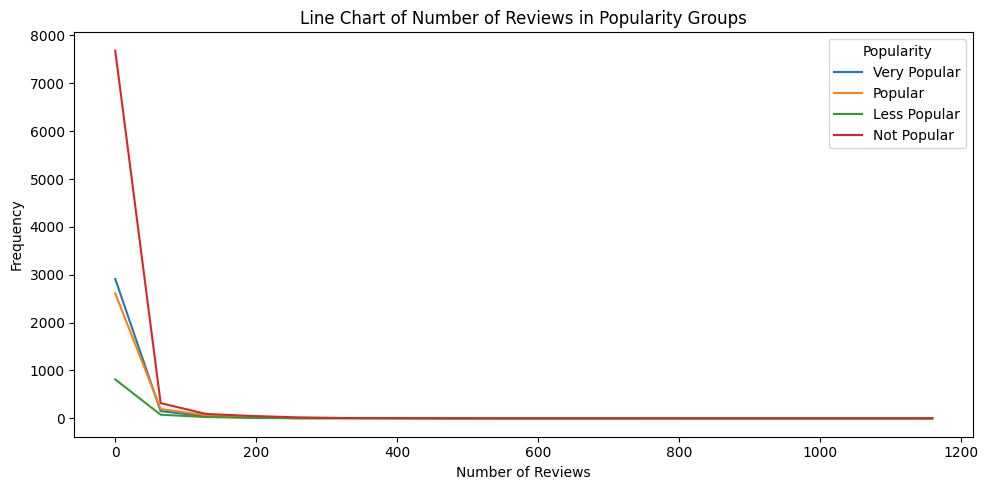

In [243]:
plt.figure(figsize=(10, 5))

# Define bins for number_of_reviews
bins = np.linspace(0, df_popular['number_of_reviews'].max(), 20)

# Plot for each popularity group
for label in df_popular['popularity'].unique():
    group = df_popular[df_popular['popularity'] == label]
    counts, _ = np.histogram(group['number_of_reviews'], bins=bins)
    sns.lineplot(x=bins[:-1], y=counts, label=label)

plt.title("Line Chart of Number of Reviews in Popularity Groups")
plt.xlabel("Number of Reviews")
plt.ylabel("Frequency")
plt.legend(title="Popularity")
plt.tight_layout()
plt.show()


Because the number of reviews appeared to be correlated with occupancy rate, I explored whether an increase in reviews could lead to higher occupancy. To investigate this, I conducted a regression analysis using `log(number_of_reviews)` as the independent variable and `occupancy_rate` as the dependent variable. The results show a statistically significant positive relationship: as the number of reviews increases, occupancy rate tends to increase as well. Specifically, the model estimates that a one-unit increase in the log of reviews corresponds to an average increase of 3.46 percentage points in occupancy rate. However, the model’s R-squared value is relatively low (0.025), indicating that reviews alone explain only a small portion of the variation in occupancy. This suggests that while guest reviews play a meaningful role, other factors—such as price, host type, and listing quality—are likely also important in driving occupancy performance.

In [ ]:
import statsmodels.api as sm

# Add 1 to avoid log(0)
df_popular['log_reviews'] = np.log1p(df_popular['number_of_reviews'])

X = sm.add_constant(df_popular['log_reviews'])  # predictor
y = df_popular['occupancy_rate']                # response

model = sm.OLS(y, X).fit()
print(model.summary())


After that, we conducted a one-way ANOVA test to examine whether the average number of reviews differed significantly across the four popularity categories. The results revealed a statistically significant difference (*F* = 34.01, *p* < 0.001), indicating that at least one group’s average number of reviews is different from the others. This suggests that popularity level is indeed associated with review count—listings that are more popular tend to have accumulated more reviews, while less popular ones receive fewer.

In [ ]:
groups = [group['number_of_reviews'].values for name, group in df_popular.groupby('popularity')]
f_stat, p_value = stats.f_oneway(*groups)
print("ANOVA F-statistic:", f_stat)
print("p-value:", p_value)

Following the ANOVA, we performed a Tukey HSD post-hoc test to determine which popularity categories differed significantly in their average number of reviews. The results show that all pairwise comparisons are statistically significant (*p* < 0.01), indicating consistent differences across all levels of popularity. 

For instance, listings in the "Not Popular" group had, on average, 11.87 more reviews than those in the "Less Popular" group, and "Very Popular" listings had significantly more reviews than "Popular" and "Less Popular" listings. These findings confirm that the number of reviews increases in line with popularity, reinforcing the idea that guest feedback plays a key role in enhancing listing visibility and success.

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD test
tukey_result = pairwise_tukeyhsd(endog=df_popular['number_of_reviews'],
                                 groups=df_popular['popularity'],
                                 alpha=0.05)

# Print the summary
print(tukey_result)

Many listings have zero reviews (5,425 listings do not have any review at all)

In [ ]:
df_popular[df_popular['number_of_reviews'] == 0]

In [ ]:
df_popular[df_popular['number_of_reviews'] == 0] \
    .groupby('popularity') \
    .size() \
    .sort_values(ascending=False)

##### **3.2.4. Minimum Nights Analysis**

The minimum nights variable plays a critical role in determining booking flexibility, guest accessibility, and overall occupancy. Listings with longer minimum stay requirements often limit potential guests—especially short-term travelers, weekend visitors, or business guests—who seek brief and flexible accommodation options.

From an analytical perspective, minimum nights can significantly influence occupancy rate and revenue performance. Properties with shorter minimum stays tend to have higher booking frequency and visibility in search results, while those with longer minimums may struggle to attract bookings unless they offer unique value or target niche markets (e.g., long-term stays or families).

Understanding how minimum night policies correlate with occupancy and popularity helps hosts and platforms optimize listing performance and better align with traveler behavior.

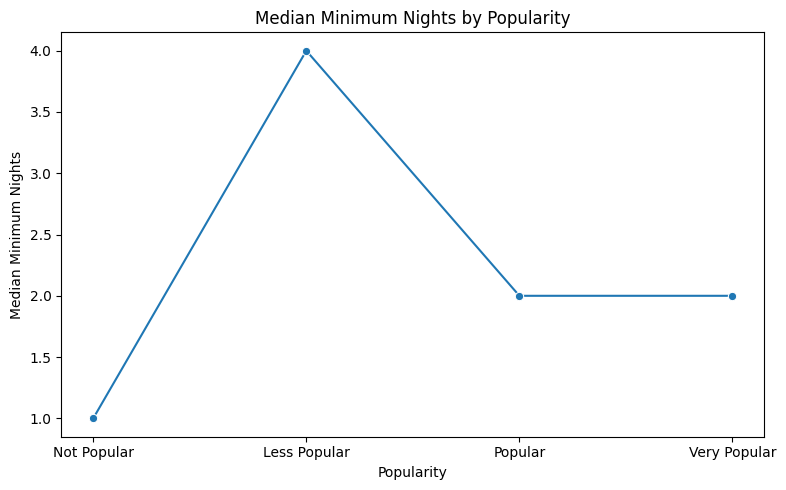

In [244]:
# Set order if needed
popularity_order = ['Not Popular', 'Less Popular', 'Popular', 'Very Popular']

# Calculate median minimum nights by popularity
median_min_nights = df_popular.groupby('popularity')['minimum_nights'].median().reindex(popularity_order)

# Plot
plt.figure(figsize=(8, 5))
sns.lineplot(x=median_min_nights.index, y=median_min_nights.values, marker='o')
plt.title('Median Minimum Nights by Popularity')
plt.xlabel('Popularity')
plt.ylabel('Median Minimum Nights')
plt.tight_layout()
plt.show()


In [ ]:
print("The median value for df_popular['minimum_nights'] is", df_popular['minimum_nights'].median())
print("The median value for df_reviewLTM['minimum_nights'] is", df_reviewLTM['minimum_nights'].median())

In [ ]:
round(df_popular['minimum_nights'].describe())

Because 75% of customers stayed under or equal to 7 nights, I then checked the histogram of this data. Next, I calculated, how much proportion of customeers who booked Airbnb property under this criterion. 

In [ ]:
print(f"Proportion: {(df_popular['minimum_nights'] <= 7).mean():.2%}")

In [245]:
(df_popular['minimum_nights'] <= 7).sum()

np.int64(11516)

In [ ]:
(df_popular['minimum_nights'] > 7).sum()

In [ ]:
plt.figure(figsize=(5, 5))
ax = sns.histplot(data=df_popular[df_popular['minimum_nights'] <= 7], x='minimum_nights', discrete=True)
plt.title('Minimum Nights Under or Equal to 7 Nights')
plt.xlabel('Minimum Nights')
plt.ylabel('Count')

# Add count labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', 
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


In [246]:
df_popular[df_popular['minimum_nights']>=7].groupby('room_type')[['name']].count().sort_values(by='room_type',ascending=False)

,name
room_type,
Shared room,12
Private room,832
Hotel room,15
Entire home/apt,3276


In [247]:
df_popular[df_popular['minimum_nights']>=7].groupby('neighbourhood')[['name']].count().sort_values(by='name',ascending=False).head(10)

,name
neighbourhood,
Vadhana,676
Khlong Toei,545
Huai Khwang,341
Ratchathewi,318
Bang Rak,201
Bang Na,191
Phra Khanong,177
Chatu Chak,173
Sathon,155


We can observe from data that the majority of guests stay for around 1-3 nights. Additionally, there appears to be demand for stays around 7 nights.  

Furthermore, most of these listings are clustered around Vadhana, Khlong Toei, and Huai Khwang. These areas are recognized as business districts in Bangkok, Thailand, known for their commercial activities, office buildings, shopping centers, and various business establishments. 

Khlong Toei, one of Bangkok's oldest and largest districts, hosts a significant portion of the city's industrial and commercial activities. Vadhana, centrally located, is home to many office buildings, embassies, and upscale residential areas. Huai Khwang is also a bustling area, featuring a blend of commercial and residential properties, including office buildings, shopping malls, and entertainment venues.

Short-term bookings are highly favored by guests, which is why reducing minimum night requirements is expected to help increase Airbnb occupancy rates. As noted by Boston.com, “For Airbnb fans, having space for a family and pets when traveling was a big reason they remain loyal to short-term rentals over hotels... the immersive experience of ‘traveling like a local’ keeps guests booked.”

# **4. Conclusion: Problem & Solution Framework**


**Problem 1: Low Occupancy Rates (33.31%)**

Many Airbnb hosts in Bangkok struggle to attract bookings, largely due to poor listing management. The majority of low-performing listings are run by micro or medium-scale hosts who may lack professional experience in hospitality. To address this, Airbnb should provide targeted hospitality training focused on guest communication, cleanliness, and review handling. This would improve guest satisfaction and increase both bookings and listing visibility, ultimately raising occupancy rates.

**Problem 2: Poor Management of Guest Reviews**

A significant number of listings—5,425 to be exact—have no guest reviews, limiting their visibility and credibility on the platform. Since listings with more reviews tend to be more popular and receive more bookings, improving review management is crucial. Hosts should be encouraged to automate post-stay messages, deliver memorable guest experiences, and follow up during the stay. Ethical encouragement to leave reviews can greatly boost visibility and trust among potential guests.

**Problem 3: Room Type and Minimum Nights Issues**

Shared and hotel-style rooms tend to underperform compared to entire homes and private rooms. Additionally, listings with long minimum night requirements often deter short-term travelers, reducing booking potential. The solution is to prioritize entire homes and private rooms, which are more in demand, and to reduce minimum night requirements to better align with short-stay market preferences. This would increase listing flexibility and attract a wider range of guests.

**Problem 4: Ineffective Pricing Strategy**

Some high-priced listings receive no bookings at all, indicating that overpricing can severely limit visibility and guest interest. A one-size-fits-all pricing model does not work in a diverse market like Bangkok. Instead, hosts should adopt a localized pricing strategy that considers the median price by room type and neighborhood. Prices should also be adjusted based on occupancy rate, review status, and minimum stay requirements to optimize both visibility and profitability.

**Problem 5: Uneven Listing Distribution Across Neighborhoods**

While neighborhoods like Huai Khwang, Bang Sue, and Nong Chok show high demand, they remain underrepresented in terms of Airbnb listings. Conversely, some oversaturated areas underperform despite a high number of listings. This calls for targeted listing expansion in high-demand, under-supplied neighborhoods. Decisions should be guided by occupancy-to-listing ratio analysis to ensure resources are directed toward areas with the highest growth potential.

### Conclusion Table

| **Problem** | **Description** | **Solution** | **Expected Outcome** |
|-------------|------------------|--------------|-----------------------|
| 1. Low Occupancy Rates | Many hosts (esp. micro/medium-scale) struggle with bookings due to poor listing management. | Hospitality training for non-professional hosts (focus: guest communication, cleanliness, reviews). | Increased guest satisfaction, bookings, and listing popularity. |
| 2. Poor Review Management | 5,425 listings have zero reviews, reducing visibility and trust. | Automate post-stay messages, enhance guest experience, ethically encourage reviews. | Higher review counts → more visibility and occupancy. |
| 3. Room Type & Minimum Nights | Shared/hotel rooms underperform; long stay requirements reduce flexibility. | Prioritize entire homes/private rooms and reduce minimum night stays. | Higher booking potential and improved guest fit. |
| 4. Ineffective Pricing Strategy | Some high-priced listings have no bookings; overpricing reduces traffic. | Use median price per room type and neighborhood; adjust for occupancy, reviews, stay length. | Optimized pricing → better visibility and conversion. |
| 5. Uneven Listing Distribution | Undersupply in high-demand areas (e.g., Huai Khwang); oversupply in low-demand zones. | Targeted expansion in high-demand neighborhoods based on occupancy-to-listing ratio. | Better market balance and growth in high-potential areas. |


In [ ]:
# Saving the dataset to CSV

df_popular.to_csv('AirbnbPopularData.csv')